Task-03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [4]:
df = pd.read_csv("Bank_Data.csv", sep =';')

In [5]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.con

In [7]:
print("\nDataset information:")
print(df.describe())


Dataset information:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578

In [8]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

In [9]:
print("\nChecking Missing values:")
print(df.isnull().sum())


Checking Missing values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
print("\nChecking for duplicates:")
print(df.duplicated().sum())


Checking for duplicates:
12


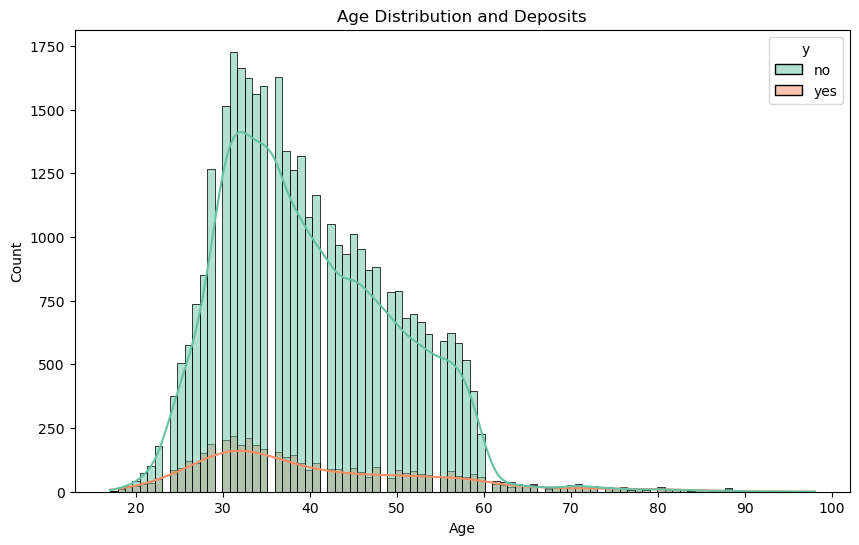

In [11]:
# Visualize 
plt.figure(figsize=(10, 6))
sns.histplot(x="age", data=df, kde=True, hue="y", palette='Set2')
plt.title("Age Distribution and Deposits")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

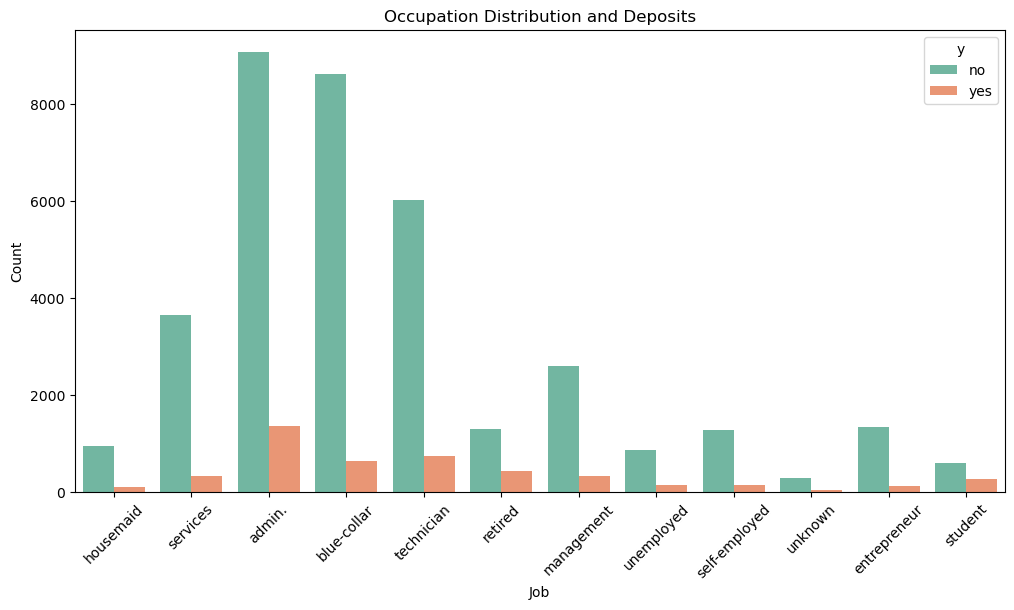

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x="job", data=df, hue="y", palette='Set2')
plt.title("Occupation Distribution and Deposits")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

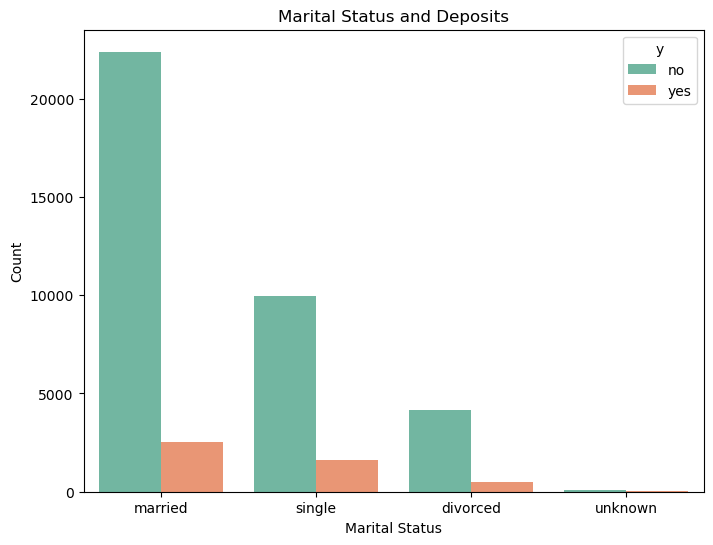

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x="marital", data=df, hue="y", palette='Set2')
plt.title("Marital Status and Deposits")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

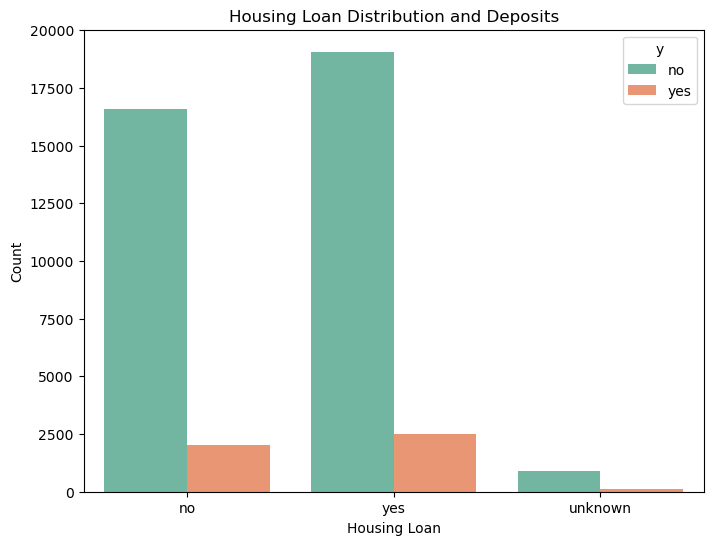

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="housing", data=df, hue="y", palette='Set2')
plt.title("Housing Loan Distribution and Deposits")
plt.xlabel("Housing Loan")
plt.ylabel("Count")
plt.show()

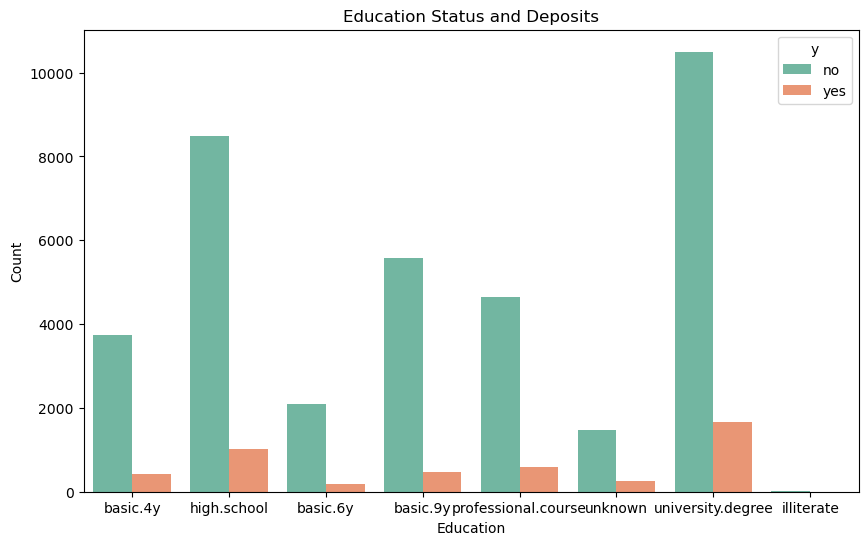

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x="education", data=df, hue="y", palette='Set2')
plt.title("Education Status and Deposits")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

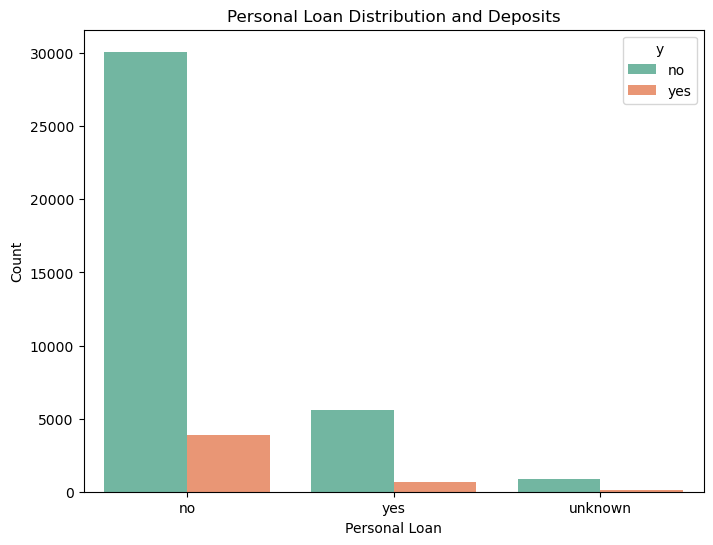

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x="loan", data=df, hue="y", palette='Set2')
plt.title("Personal Loan Distribution and Deposits")
plt.xlabel("Personal Loan")
plt.ylabel("Count")
plt.show()

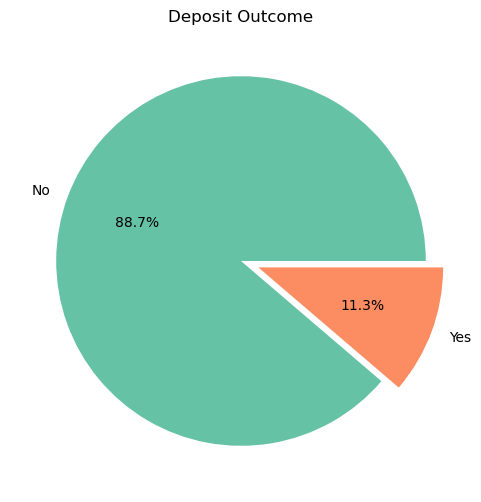

In [17]:
plt.figure(figsize=(6, 6))
colors = sns.color_palette('Set2')
df.y.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0, 0.1], labels=['No', 'Yes'], colors=colors)
plt.title('Deposit Outcome')
plt.ylabel('')
plt.show()

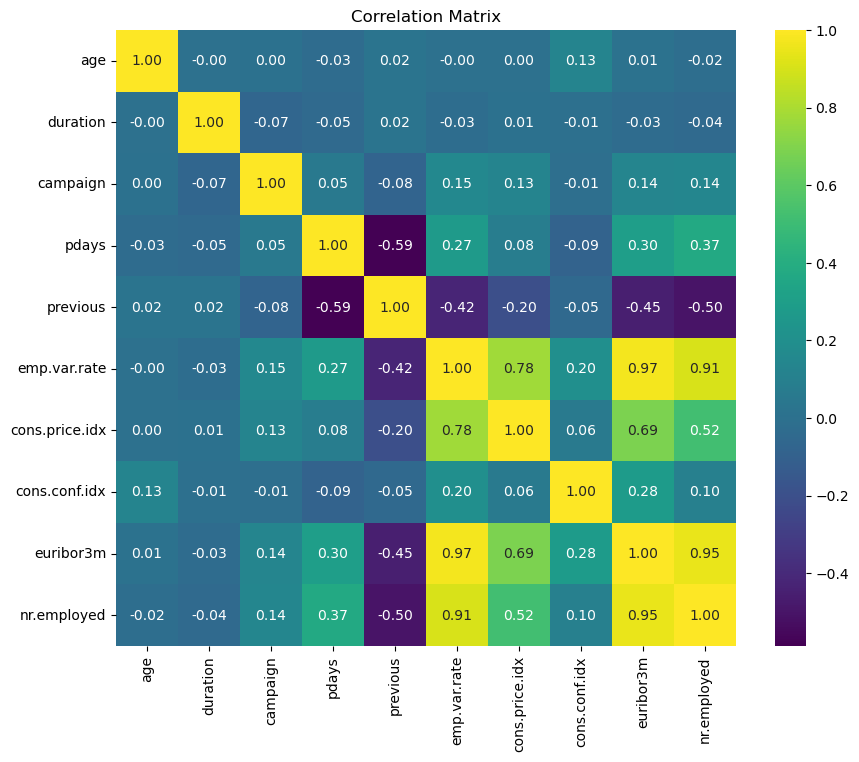

In [19]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include='number')

# Generate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [22]:
# Data Preprocessing
cols = df.select_dtypes("object").columns
le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)

In [23]:
# Train-test split
X = df.drop("y", axis=1)
y = df.y
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [24]:
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [30]:
# Model Training and Evaluation
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

print('Train Score: {:.2f}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {:.2f}'.format(decision_tree.score(test_X, test_y)))

cross_val = cross_val_score(decision_tree, train_X, train_y, cv=5).mean()
print('Cross Validation Score: {:.2f}'.format(cross_val))

ypred = decision_tree.predict(test_X)
print(classification_report(test_y, ypred))

Train Score: 1.00
Test Score: 0.89
Cross Validation Score: 0.89
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10971
           1       0.51      0.54      0.53      1386

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [31]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9, 10, 20]
}

gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

print("Best Parameters:", gscv.best_params_)

best_decision_tree = gscv.best_estimator_
cross_val_best = cross_val_score(best_decision_tree, train_X, train_y, cv=5).mean()
print('Cross Validation Score with Best Estimator: {:.2f}'.format(cross_val_best))

ypred_best = best_decision_tree.predict(test_X)
print(classification_report(test_y, ypred_best))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 9}
Cross Validation Score with Best Estimator: 0.91
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10971
           1       0.66      0.53      0.58      1386

    accuracy                           0.92     12357
   macro avg       0.80      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



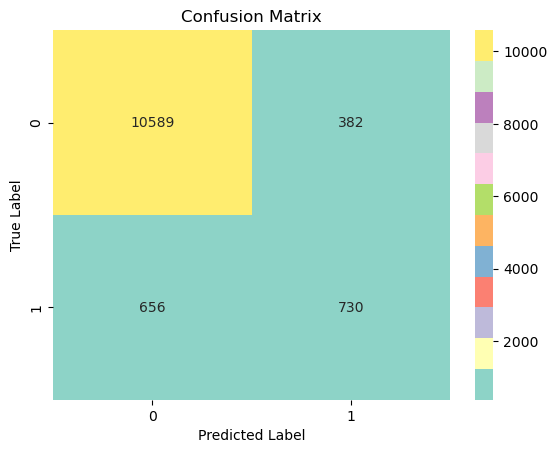

In [32]:
# Confusion Matrix
cm = confusion_matrix(test_y, ypred_best)
sns.heatmap(cm, cmap='Set3', annot=True, fmt="d", xticklabels=best_decision_tree.classes_, yticklabels=best_decision_tree.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [33]:
# Accuracy Score
accuracy = accuracy_score(test_y, ypred_best)
print("Test Accuracy of Decision Tree Classifier: {:.2f}%".format(accuracy * 100))

Test Accuracy of Decision Tree Classifier: 91.60%


In [34]:
# Cross Validation Score
cross_val = cross_val_score(best_decision_tree, test_X, test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Decision Tree: {:.2f}%".format(cross_val * 100))

Cross-Validation Accuracy Scores Decision Tree: 91.09%
